In [214]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [215]:
import numpy as np
from copy import deepcopy

In [232]:
# Loads in Map from Google Drive
map_name = "final"
base_path = "/content/drive/MyDrive/ML/MDP/Data/"
path = base_path + map_name + ".txt"
with open(path) as f:
    lines = f.readlines()

In [233]:
#Initializes Map Information to variables
n = int(lines[0])
gamma = float(lines[1])
noise_str = lines[2].strip().split(", ")
print(n, gamma)
map = []
v = []
for line in lines[4:]:
  sep = line.strip().split(",")
  new_str = line.strip().replace("X", "0").split(",")
  l = []
  for i in new_str:
    l.append(int(i))
  v.append(l)
  map.append(sep)

5 0.9


In [234]:
#converts the noise to usable directions
noise = [float(i) for i in noise_str]
noise_arr = [0, 1, -1, 2]
reward = deepcopy(v)

In [235]:
#converts directions to coordinate movements
actions = [(-1, 0), (0, 1), (1, 0), (0, -1)]

In [236]:
#helper method to check if its inbound
def in_bounds(a, i, j):
  movement = actions[a]
  new_i, new_j = i + movement[0], j + movement[1]
  if(new_i >= n or new_i < 0 or new_j >= n or new_j < 0):
    return False
  return True
#calculates q_value at location (i, j) given action a
def get_q(v_old, a, i, j):
  q_val = 0
  for k in range(len(noise)):
    move = (a + noise_arr[k]) % len(actions)
    movement = actions[move]
    new_i, new_j = i + movement[0], j + movement[1]
    if(in_bounds(move, i, j)):
      q_val += noise[k] * (reward[new_i][new_j] + gamma * v_old[new_i][new_j])
    else:
      q_val += noise[k] * (-50)
  return q_val

In [237]:
#training loop
new_v = deepcopy(v)
old_v = deepcopy(v)
dir_arr = deepcopy(v)
old_dir_arr = deepcopy(v)
epochs = 100
ran_epochs = 0
for i in range(epochs):
  converter = ['N', 'E', 'S', 'W']
  for i in range(n):
    for j in range(n):
      q = []
      if(reward[i][j] != 0):
        q.append(reward[i][j])
      else:
        for k in range(len(actions)):
          q.append(get_q(old_v, k, i, j))
      dir_arr[i][j] = converter[q.index(max(q))]
      new_v[i][j] = max(q)
  if(dir_arr == old_dir_arr):
    ran_epochs = i
    break
  old_dir_arr = dir_arr
  old_v = deepcopy(new_v)

In [238]:
print(ran_epochs)

4


Results for final after converging in 4 iterations


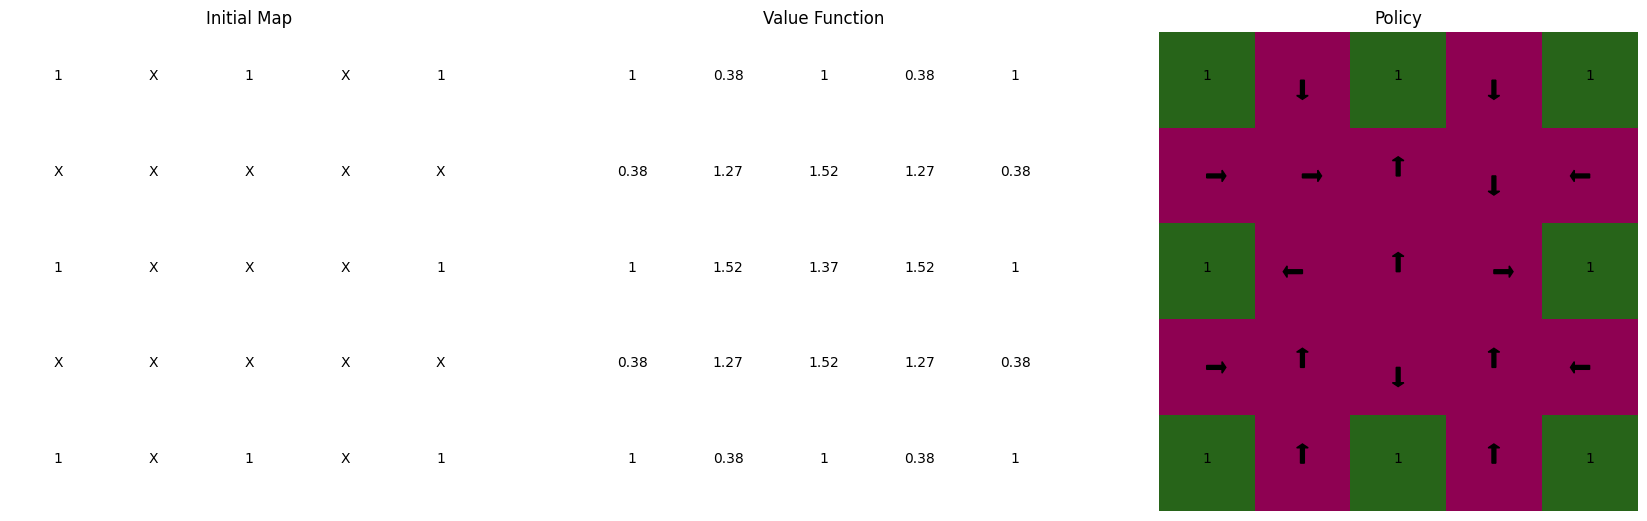

In [239]:
#Visualization
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.colors import NoNorm

def convert_directions_to_grid(directions):
    rows = len(directions)
    cols = len(directions[0])
    grid = np.zeros((rows, cols))

    for i in range(rows):
        for j in range(cols):
            direction = directions[i][j]

            if direction == 'N':
                grid[i, j] = 1
            elif direction == 'E':
                grid[i, j] = 2
            elif direction == 'S':
                grid[i, j] = 3
            elif direction == 'W':
                grid[i, j] = 4

    return grid

def display_directions_grid(directions, rewards, q_val):
    grid = convert_directions_to_grid(directions)
    zero = np.zeros((n, n)) + 255
    rows = len(grid)
    cols = len(grid[0])

    fig, (ax1, ax2, ax) = plt.subplots(1, 3, figsize = (21, 7))
    ax1.set_aspect('equal')
    ax1.axis('off')
    ax1.imshow(zero, cmap = 'gray', norm = NoNorm())
    ax1.set_title("Initial Map")


    ax2.set_aspect('equal')
    ax2.axis('off')
    ax2.imshow(zero, cmap = 'gray', norm = NoNorm())
    ax2.set_title("Value Function")


    ax.set_aspect('equal')
    ax.axis('off')
    ax.imshow(rewards, cmap = 'PiYG')
    ax.set_title("Policy")
    for i in range(rows):
        for j in range(cols):
          ax1.annotate(map[i][j], (j, i), ha = 'center')
          ax2.annotate(round(q_val[i][j], 2), (j, i), ha = 'center')
          if(rewards[i][j]!= 0):
            ax.annotate(rewards[i][j], (j, i), ha = 'center')
            continue
          if grid[i, j] == 1:  # North arrow
              ax.add_patch(patches.Arrow(j, i, 0, -0.2, width=0.2, color='black'))
          elif grid[i, j] == 2:  # East arrow
              ax.add_patch(patches.Arrow(j, i, 0.2, 0, width=0.2, color='black'))
          elif grid[i, j] == 3:  # South arrow
              ax.add_patch(patches.Arrow(j, i, 0, 0.2, width=0.2, color='black'))
          elif grid[i, j] == 4:  # West arrow
              ax.add_patch(patches.Arrow(j , i, -0.2, 0, width=0.2, color='black'))
    print("Results for " + map_name + " after converging in " + str(ran_epochs) + " iterations")
    plt.show()

display_directions_grid(dir_arr, reward, new_v)
